#### importing data

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
data=datasets.load_wine()

In [39]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [9]:
#featue_names of x
print(data.feature_names,'\n')

#y names
print(data.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] 

['class_0' 'class_1' 'class_2']


In [40]:
df=pd.DataFrame(data=data.data,columns=data.feature_names)
df['target']=data.target

In [41]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


#### Analysis

In [42]:
df.shape

(178, 14)

In [45]:
df.target.unique()

array([0, 1, 2])

In [47]:
from pandas_profiling import ProfileReport
report=ProfileReport(df)
report.to_file(output_file='winAnalysis.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [48]:
df.nunique()

alcohol                         126
malic_acid                      133
ash                              79
alcalinity_of_ash                63
magnesium                        53
total_phenols                    97
flavanoids                      132
nonflavanoid_phenols             39
proanthocyanins                 101
color_intensity                 132
hue                              78
od280/od315_of_diluted_wines    122
proline                         121
target                            3
dtype: int64

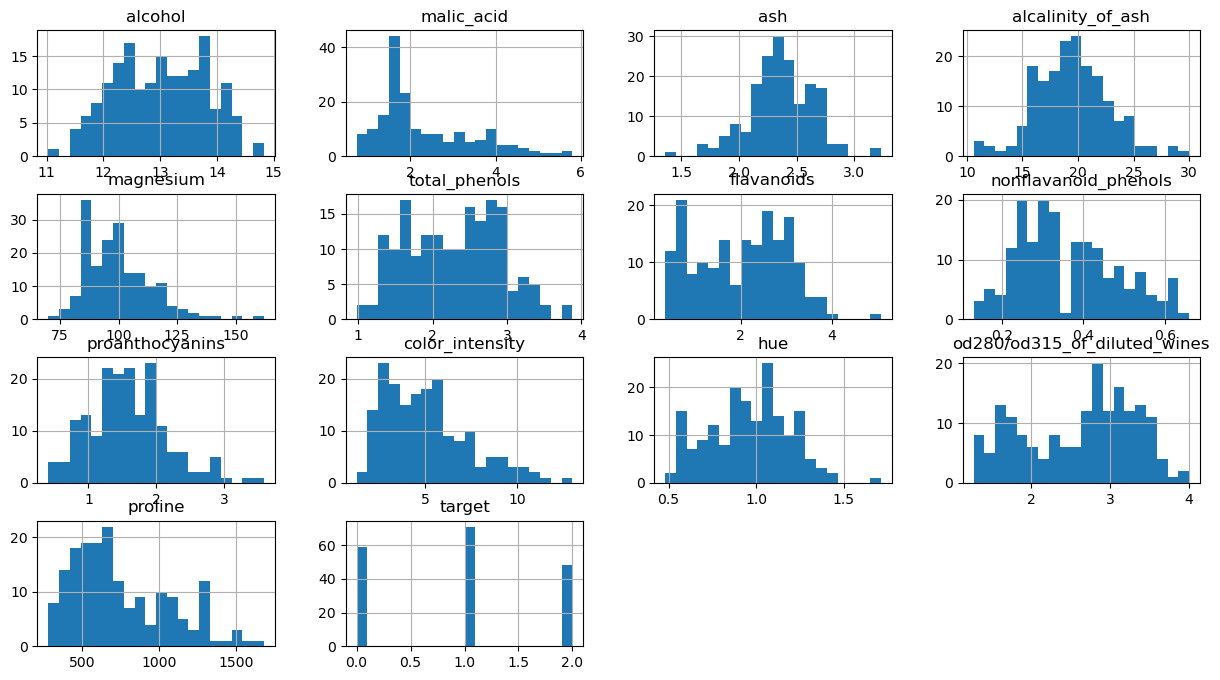

In [52]:
df.hist(bins=20,figsize=(15,8))
plt.show()

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

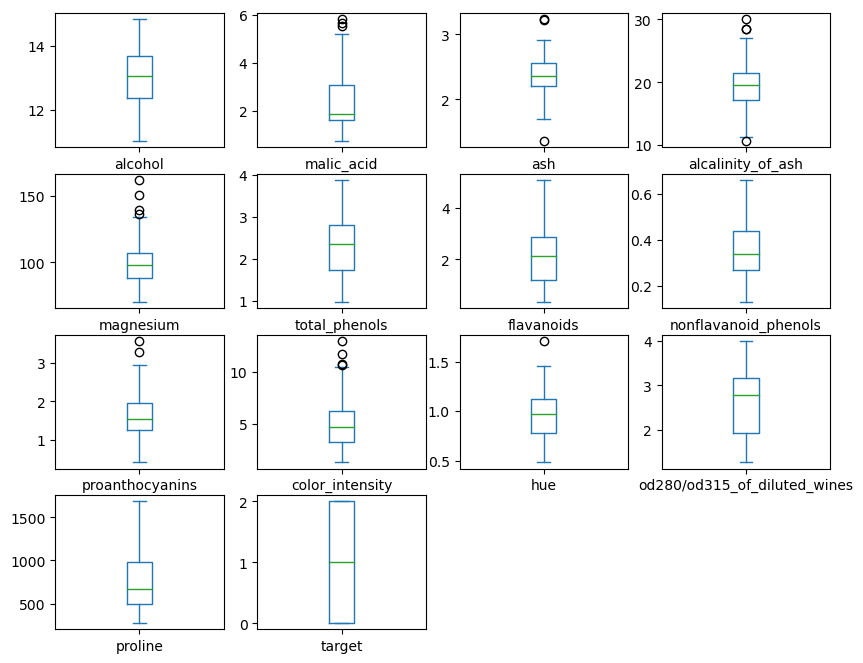

In [55]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(10,8))
plt.show()

C:\Users\Nithin\AppData\Local\Temp\ipykernel_29044\4039752528.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,fontsize=9)
C:\Users\Nithin\AppData\Local\Temp\ipykernel_29044\4039752528.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels,fontsize=9)


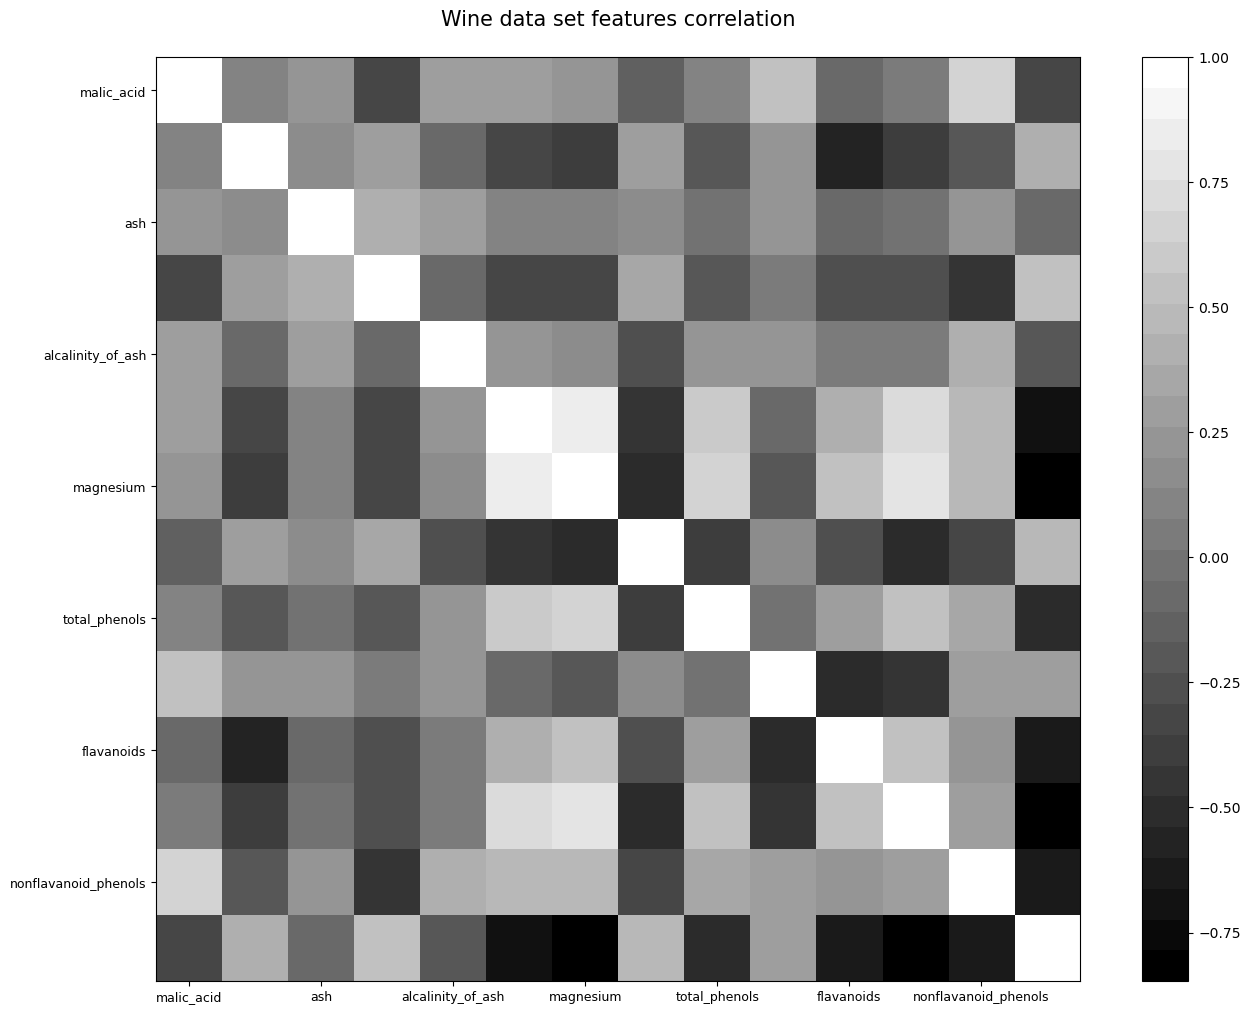

In [95]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(111)
cmap = plt.cm.get_cmap('gray', 30)
cax = ax1.imshow(df.corr(), cmap=cmap)
plt.title('Wine data set features correlation\n',fontsize=15)
labels=df.columns
ax1.set_xticklabels(labels,fontsize=9)
ax1.set_yticklabels(labels,fontsize=9)

fig.colorbar(cax)
plt.show()


#### train test

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.2,random_state=15)

In [17]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((142, 13), (36, 13), (142,), (36,))

#### GaussianNB

In [21]:
from sklearn.naive_bayes import GaussianNB
wine=GaussianNB()

#train the model using train test
wine.fit(X_train,y_train)

#predicting
y_pred=wine.predict(X_test)

#### Evaluating

[[11  1  0]
 [ 0 12  0]
 [ 0  0 12]] 



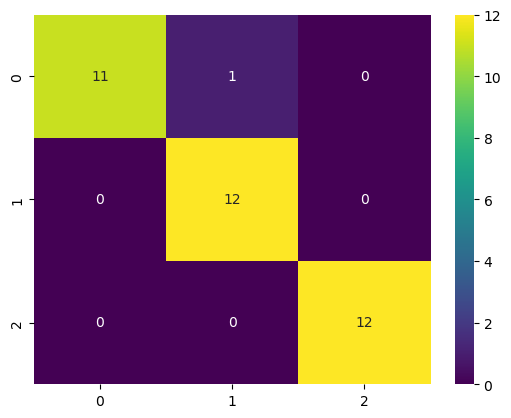

In [102]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#confusion matrix
cm=confusion_matrix(y_test,y_pred)
print(cm,'\n')
sns.heatmap(cm,cmap=sns.color_palette("viridis", as_cmap=True), annot=True)
plt.show()

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



In [26]:
#accuracy
accuracy_score(y_test,y_pred)

0.9722222222222222